In [10]:
import requests
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

## Json

In [38]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=COFFEE&interval=monthly&apikey=26B3CDZ7KYBASZXV'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Global Price of Coffee', 'interval': 'monthly', 'unit': 'cents per pound', 'data': [{'date': '2023-09-01', 'value': '183.589047619048'}, {'date': '2023-08-01', 'value': '186.346956521739'}, {'date': '2023-07-01', 'value': '193.494285714286'}, {'date': '2023-06-01', 'value': '207.385'}, {'date': '2023-05-01', 'value': '220.121304347826'}, {'date': '2023-04-01', 'value': '229.9555'}, {'date': '2023-03-01', 'value': '222.663913043478'}, {'date': '2023-02-01', 'value': '229.506'}, {'date': '2023-01-01', 'value': '206.76'}, {'date': '2022-12-01', 'value': '210.388636363636'}, {'date': '2022-11-01', 'value': '213.718181818182'}, {'date': '2022-10-01', 'value': '240.082380952381'}, {'date': '2022-09-01', 'value': '267.492272727273'}, {'date': '2022-08-01', 'value': '268.48347826087'}, {'date': '2022-07-01', 'value': '255.906666666667'}, {'date': '2022-06-01', 'value': '273.763636363636'}, {'date': '2022-05-01', 'value': '260.449545454545'}, {'date': '2022-04-01', 'value': '265.39761

In [40]:
data

{'name': 'Global Price of Coffee',
 'interval': 'monthly',
 'unit': 'cents per pound',
 'data': [{'date': '2023-09-01', 'value': '183.589047619048'},
  {'date': '2023-08-01', 'value': '186.346956521739'},
  {'date': '2023-07-01', 'value': '193.494285714286'},
  {'date': '2023-06-01', 'value': '207.385'},
  {'date': '2023-05-01', 'value': '220.121304347826'},
  {'date': '2023-04-01', 'value': '229.9555'},
  {'date': '2023-03-01', 'value': '222.663913043478'},
  {'date': '2023-02-01', 'value': '229.506'},
  {'date': '2023-01-01', 'value': '206.76'},
  {'date': '2022-12-01', 'value': '210.388636363636'},
  {'date': '2022-11-01', 'value': '213.718181818182'},
  {'date': '2022-10-01', 'value': '240.082380952381'},
  {'date': '2022-09-01', 'value': '267.492272727273'},
  {'date': '2022-08-01', 'value': '268.48347826087'},
  {'date': '2022-07-01', 'value': '255.906666666667'},
  {'date': '2022-06-01', 'value': '273.763636363636'},
  {'date': '2022-05-01', 'value': '260.449545454545'},
  {'dat

In [39]:
data1 = data['Time Series (30min)']
close_prices = [entry['4. close'] for entry in data1.values()]
open_prices = [entry['1. open'] for entry in data1.values()]

KeyError: 'Time Series (30min)'

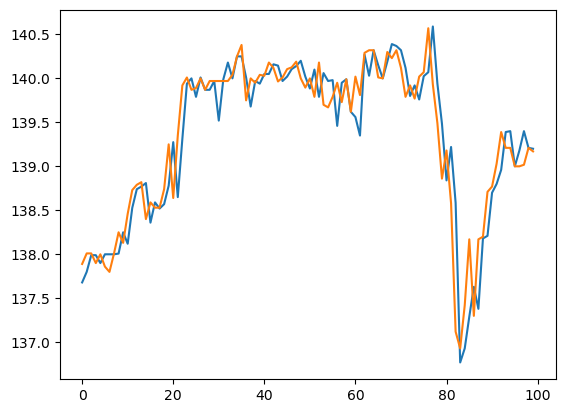

In [6]:
arrays = np.array(close_prices,dtype=float)
arrays2 = np.array(open_prices, dtype=float)
plt.plot(arrays)
plt.plot(arrays2)

## Csv

In [13]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=30min&apikey=26B3CDZ7KYBASZXV'
r = requests.get(url)
data = r.json()


In [20]:
df = pd.DataFrame.from_dict(data["Time Series (30min)"] ,orient='index' )
df.head()

,1. open,2. high,3. low,4. close,5. volume
2023-10-19 19:30:00,137.8900,137.9000,137.5500,137.6800,32
2023-10-19 19:00:00,138.0100,138.0100,137.5500,137.8000,672482
2023-10-19 18:30:00,138.0100,138.0100,137.7500,137.9900,672527
2023-10-19 18:00:00,137.9000,137.9900,137.9000,137.9900,7
2023-10-19 17:30:00,138.0000,138.0000,137.8900,137.9000,19


In [37]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df,"4. close")

AttributeError: 'time_col' is of 'object' dtype but doesn't contain valid timestamps


AttributeError: 'time_col' is of 'object' dtype but doesn't contain valid timestamps